<a href="https://colab.research.google.com/github/ameenattar92/Cardiovascular-Risk-Prediction/blob/main/Hrithik_Cardiovascular_Risk_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROBLEM STATEMENT**

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts.
The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD).
The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. 

**Variables**

Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors. 

**Data Description**

**Demographic:**

• Sex: male or female("M" or "F") 

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

**Behavioral**

• is_smoking: whether or not the patient is a current smoker ("YES" or "NO") 

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical(History)**

• BP Meds: whether or not the patient was on blood pressure medication (Nominal) 

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal) 

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal) 

• Diabetes: whether or not the patient had diabetes (Nominal) 
Medical(current) 

• Tot Chol: total cholesterol level (Continuous) 

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous) 

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.) 

• Glucose: glucose level (Continuous) 
Predict variable (desired target) 

• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) - DV


In [1]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing  import OneHotEncoder
from sklearn import ensemble

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#Reading the data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = ("/content/drive/MyDrive/Cardiovascular Risk Prediction - Hrithik Chourasia/data_cardiovascular_risk.csv")

In [4]:
cvs_df = pd.read_csv(file_path , index_col = "id")

#1. Explorartory Data Analysis

In [5]:
#Checking the first five observations
cvs_df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [6]:
#Checking the bottom five observations
cvs_df.tail()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [7]:
#Checking the shape of our dataset
cvs_df.shape

(3390, 16)

In [8]:
#Looking at the info of our dataset
cvs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 450.2+ KB


In [9]:
#Looking up for the detailed description of our dataset.
cvs_df.describe(include='all')

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


In [10]:
#Renaming the column names
cvs_df.rename(columns = {'totChol' : 'Total_Cholestrol'}, inplace=True)
cvs_df.rename(columns = {'sysBP' : 'Systolic_BP'}, inplace=True)
cvs_df.rename(columns = {'diaBP' : 'Diastolic_BP'}, inplace=True)

In [11]:
cvs_df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,Total_Cholestrol,Systolic_BP,Diastolic_BP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


#Exploring the dependent variable

In [12]:
#Checking the values of our DV
cvs_df['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

In [13]:
#Checking the Null values
cvs_df['TenYearCHD'].isnull().sum()

0

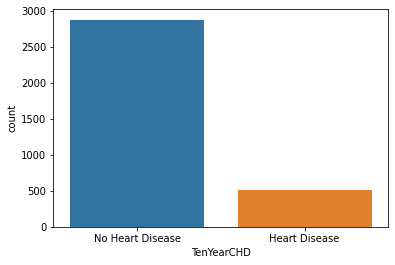

In [14]:
# visualizing the target variable
g = sns.countplot(cvs_df['TenYearCHD'])
g.set_xticklabels(['No Heart Disease','Heart Disease'])
plt.show()

In [15]:
# Class count
class_count_0, class_count_1 = cvs_df['TenYearCHD'].value_counts()

# Separate class
class_0 = cvs_df[cvs_df['TenYearCHD'] == 0]
class_1 = cvs_df[cvs_df['TenYearCHD'] == 1]
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (2879, 16)
class 1: (511, 16)




Now let's go ahead and check for the missing values in rest of the dataset

In [16]:
#Checking the missing values for whole dataset
missing_values = cvs_df.isnull()

In [17]:
missing_values

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,Total_Cholestrol,Systolic_BP,Diastolic_BP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3386,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3387,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


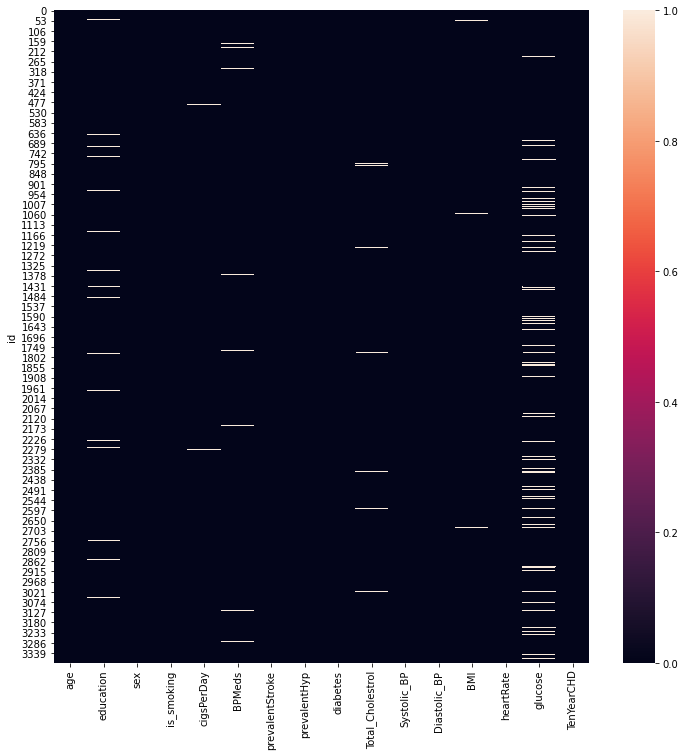

In [18]:
#Plotting the heatmap for missing values 

plt.figure(figsize=(12,12))
sns.heatmap(missing_values)

In [19]:
# Summing up the missing values 
cvs_df.isnull().sum()


age                   0
education            87
sex                   0
is_smoking            0
cigsPerDay           22
BPMeds               44
prevalentStroke       0
prevalentHyp          0
diabetes              0
Total_Cholestrol     38
Systolic_BP           0
Diastolic_BP          0
BMI                  14
heartRate             1
glucose             304
TenYearCHD            0
dtype: int64

As we can see above the Glucose feature has the highest number of missing values followed by education, BPmeds, TotalCholestrol, CigsPerday, BMI & heartRate.

In [20]:
# Filling up the numerical NaN values using mode

cvs_df['education'].fillna(cvs_df['education'].mode()[0], inplace=True)
cvs_df['cigsPerDay'].fillna(cvs_df['cigsPerDay'].mode()[0], inplace=True)
cvs_df['BPMeds'].fillna(cvs_df['BPMeds'].mode()[0], inplace=True)
cvs_df['Total_Cholestrol'].fillna(cvs_df['Total_Cholestrol'].mode()[0], inplace=True)
cvs_df['glucose'].fillna(cvs_df['glucose'].mode()[0], inplace=True)
cvs_df['BMI'].fillna(cvs_df['BMI'].mode()[0], inplace=True)
cvs_df['heartRate'].fillna(cvs_df['heartRate'].mode()[0], inplace=True)

In [21]:
filled_NaN = cvs_df.isnull()

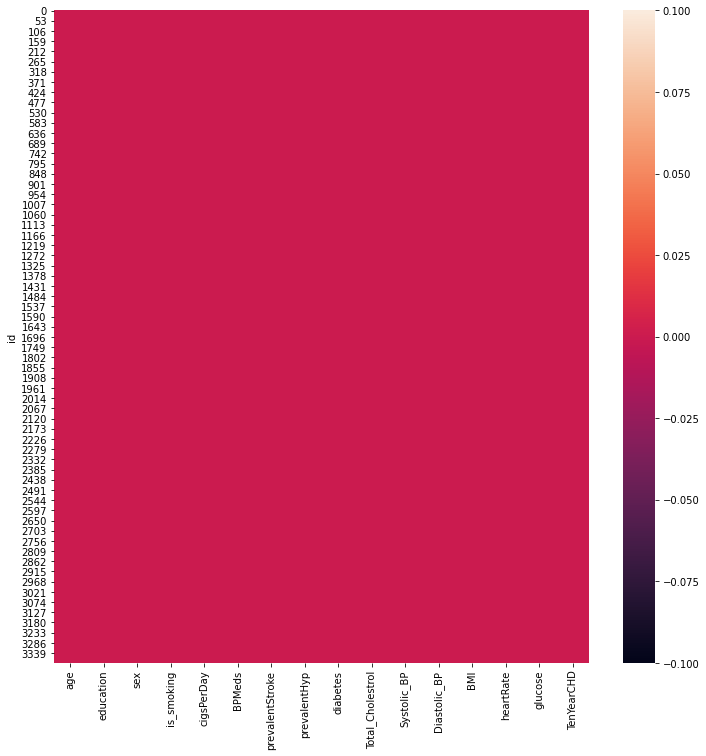

In [22]:
#Plotting the heatmap after treating the missing values
plt.figure(figsize=(12,12))
sns.heatmap(filled_NaN)

In [23]:
cvs_df.isnull().sum()

age                 0
education           0
sex                 0
is_smoking          0
cigsPerDay          0
BPMeds              0
prevalentStroke     0
prevalentHyp        0
diabetes            0
Total_Cholestrol    0
Systolic_BP         0
Diastolic_BP        0
BMI                 0
heartRate           0
glucose             0
TenYearCHD          0
dtype: int64

As seen above all the missing values has been treated.

Now let's check the correlation between each feature.

In [24]:
#Checking for correlation
cvs_df.corr()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,Total_Cholestrol,Systolic_BP,Diastolic_BP,BMI,heartRate,glucose,TenYearCHD
age,1.000000,-0.170614,-0.191465,0.122114,0.059038,0.308826,0.107875,0.272431,0.404845,0.221896,0.136363,-0.002636,0.113058,0.224927
education,-0.170614,1.000000,0.014078,-0.019880,-0.031820,-0.081925,-0.051895,-0.021412,-0.132202,-0.060774,-0.135431,-0.039395,-0.040193,-0.051388
cigsPerDay,-0.191465,0.014078,1.000000,-0.035727,-0.041576,-0.078003,-0.048114,-0.025036,-0.100348,-0.068320,-0.099474,0.066229,-0.066279,0.068020
BPMeds,0.122114,-0.019880,-0.035727,1.000000,0.116183,0.256892,0.070932,0.081355,0.260384,0.198780,0.087994,0.018107,0.061193,0.087349
prevalentStroke,0.059038,-0.031820,-0.041576,0.116183,1.000000,0.071652,0.010115,-0.010890,0.057568,0.047235,0.012801,-0.019183,0.024064,0.068627
prevalentHyp,0.308826,-0.081925,-0.078003,0.256892,0.071652,1.000000,0.082565,0.158779,0.699285,0.612897,0.298712,0.150731,0.082986,0.166544
diabetes,0.107875,-0.051895,-0.048114,0.070932,0.010115,0.082565,1.000000,0.058952,0.124011,0.061165,0.085866,0.039746,0.609351,0.103681
Total_Cholestrol,0.272431,-0.021412,-0.025036,0.081355,-0.010890,0.158779,0.058952,1.000000,0.198005,0.153819,0.114373,0.087208,0.061132,0.093745
Systolic_BP,0.404845,-0.132202,-0.100348,0.260384,0.057568,0.699285,0.124011,0.198005,1.000000,0.781908,0.330151,0.178135,0.138203,0.212703
Diastolic_BP,0.221896,-0.060774,-0.068320,0.198780,0.047235,0.612897,0.061165,0.153819,0.781908,1.000000,0.379489,0.174908,0.069430,0.135979


In [25]:
#checking for correlation between columns 
print(cvs_df.corr()['TenYearCHD'].abs().sort_values(ascending=False))

TenYearCHD          1.000000
age                 0.224927
Systolic_BP         0.212703
prevalentHyp        0.166544
Diastolic_BP        0.135979
glucose             0.133860
diabetes            0.103681
Total_Cholestrol    0.093745
BPMeds              0.087349
prevalentStroke     0.068627
cigsPerDay          0.068020
BMI                 0.063646
education           0.051388
heartRate           0.020167
Name: TenYearCHD, dtype: float64


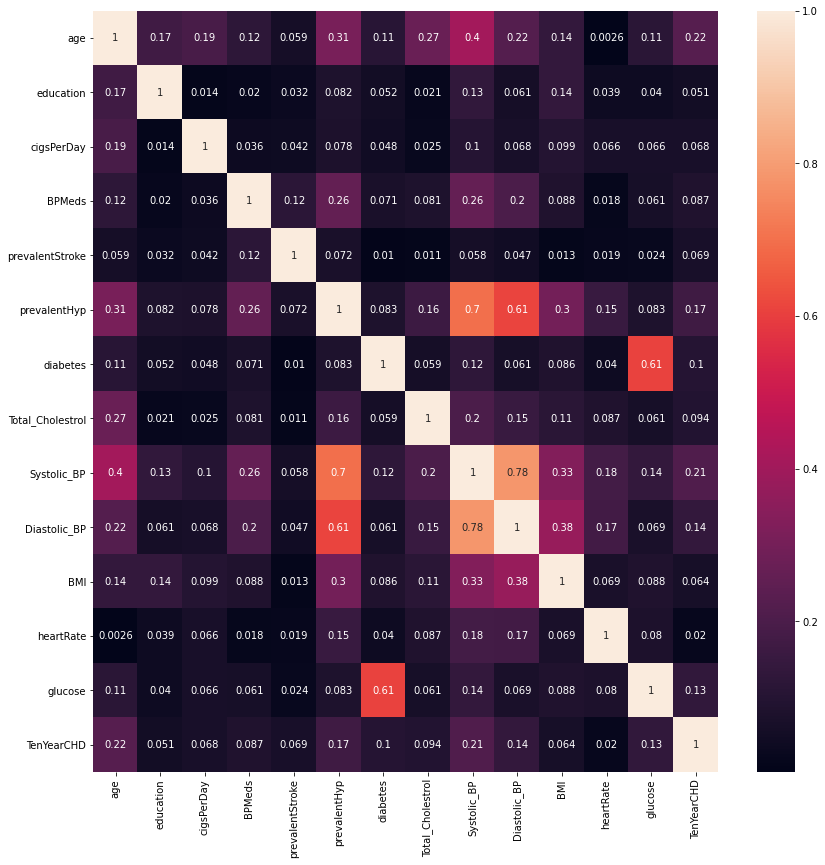

In [26]:
#Plotting the correlation matrix using heatmap
plt.figure(figsize=(14,14))
correlation = cvs_df.corr()
sns.heatmap(abs(correlation), annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f95a4c3e650>,
      dtype=object)

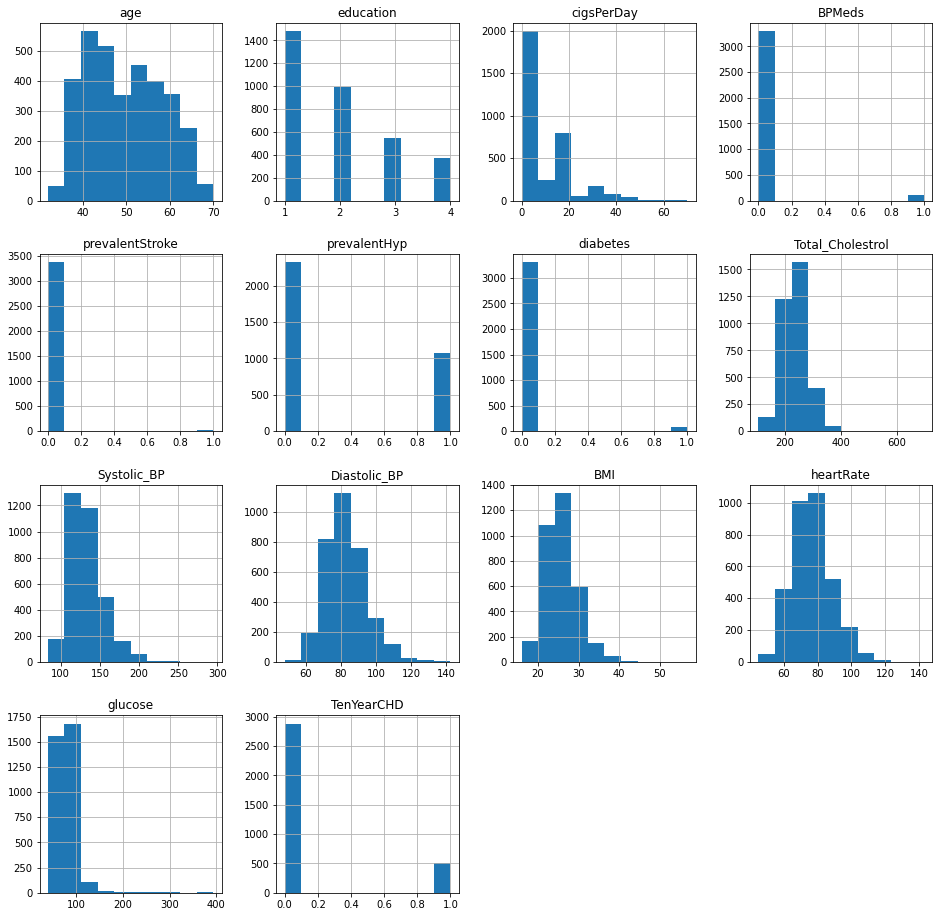

In [27]:
cvs_df.hist(figsize=(16,16))

#Analysing the categorical features

In [28]:
#Analysing 'sex' feature
cvs_df['sex'].unique()

array(['F', 'M'], dtype=object)

In [29]:
#one hot encoding
#pd.get_dummies(cvs_df.sex).head()

In [30]:
cvs_df['sex'].value_counts()

F    1923
M    1467
Name: sex, dtype: int64

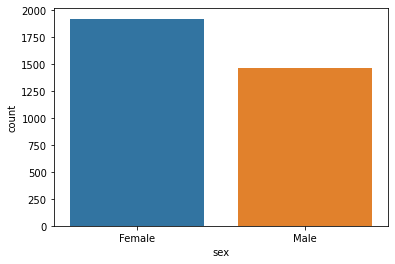

In [31]:
# visualizing the sex feature
g = sns.countplot(cvs_df['sex'])
g.set_xticklabels(['Female','Male'])
plt.show()

In [32]:
#Analysing is_smoking feature
cvs_df['is_smoking'].unique()

array(['YES', 'NO'], dtype=object)

In [33]:
cvs_df['is_smoking'].value_counts()

NO     1703
YES    1687
Name: is_smoking, dtype: int64

In [34]:
#one hot encoding

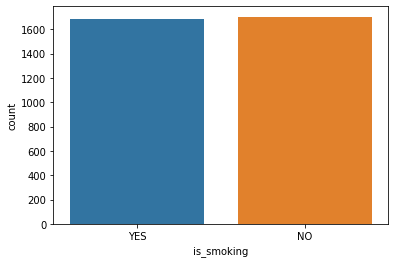

In [35]:
# visualizing the is_smoking feature
g = sns.countplot(cvs_df['is_smoking'])
plt.show()

#Individual Notebook

In [36]:
import seaborn as sns; import matplotlib.pyplot as plt;
sns.set();
from sklearn.preprocessing import StandardScaler


**Which Sex is prone to coronary heart disease?**

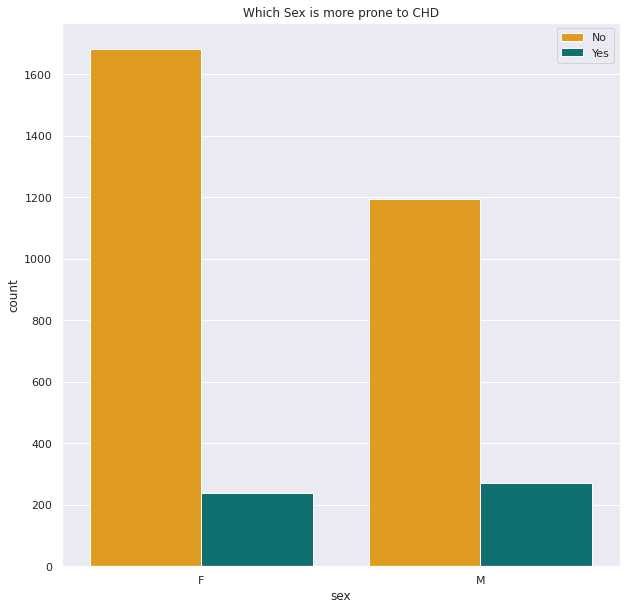

In [50]:
my_palette = {0 : 'orange' , 1 : 'teal'}
#10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)
plt.figure(figsize = (10,10))
sns.countplot(x = cvs_df['sex'], hue = cvs_df['TenYearCHD'], palette = my_palette)
plt.title("Which Sex is more prone to CHD")
plt.legend(['No','Yes'])
plt.show()

**Which Sex is prone to diabetes?**

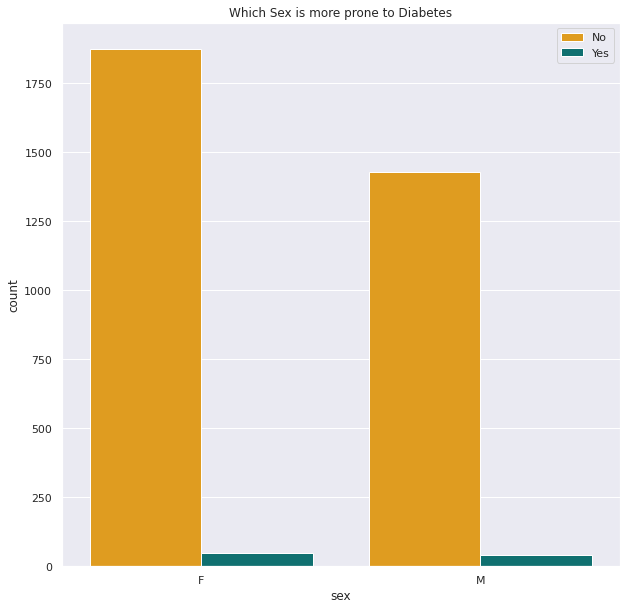

In [51]:
plt.figure(figsize = (10,10))
my_palette = {0 : 'orange' , 1 : 'teal'}
sns.countplot(x = cvs_df['sex'], hue = cvs_df['diabetes'], palette = my_palette)
plt.title("Which Sex is more prone to Diabetes")
plt.legend(['No','Yes'])
plt.show()

**Is diabetes patients are at more risk of coronary heart disease ??**

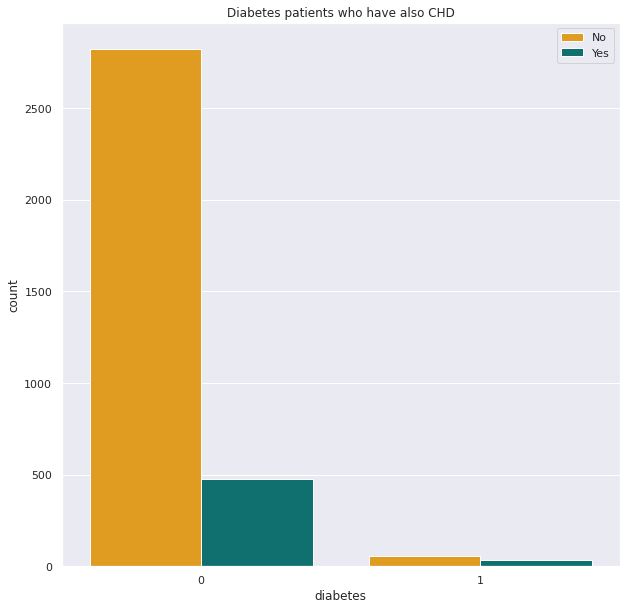

In [52]:

my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (10,10))
sns.countplot(x = cvs_df['diabetes'], hue = cvs_df['TenYearCHD'], palette = my_palette)
plt.title("Diabetes patients who have also CHD")
plt.legend(['No','Yes']) 
plt.show()

**Is a smoking person are at more risk of coronary heart disease ??**

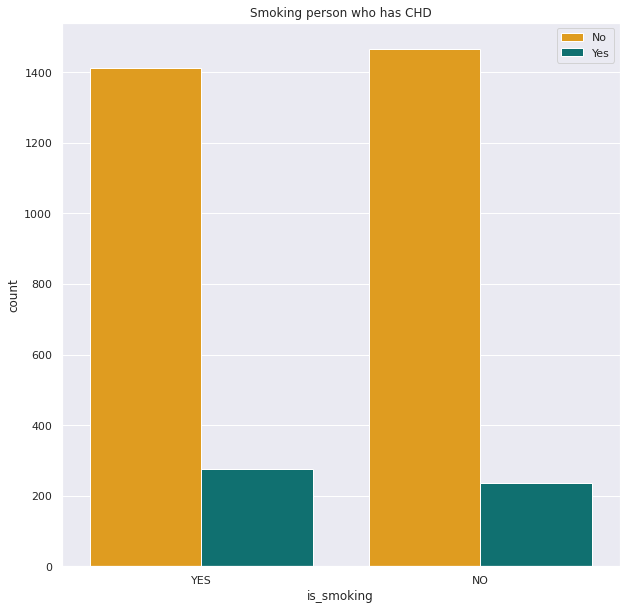

In [53]:

my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (10,10))
sns.countplot(x = cvs_df['is_smoking'], hue = cvs_df['TenYearCHD'], palette = my_palette)
plt.title("Smoking person who has CHD")
plt.legend(['No','Yes'])
plt.show()

**Is blood pressure patients are at more risk of coronary heart disease ??**

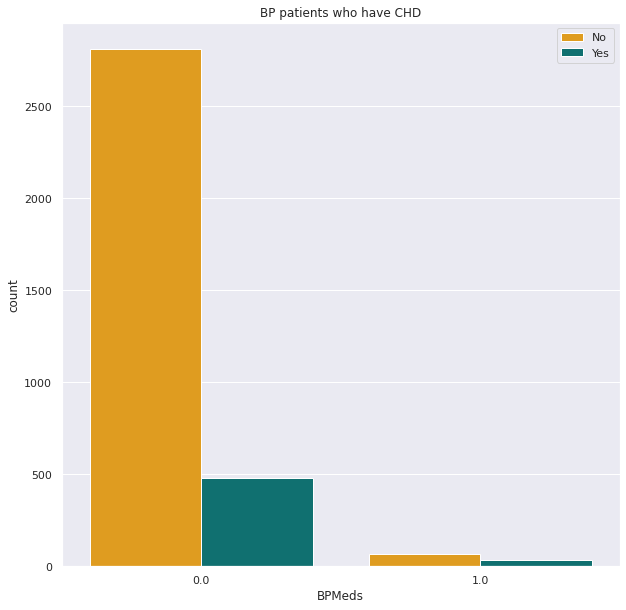

In [54]:

my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (10,10))
sns.countplot(x = cvs_df['BPMeds'], hue = cvs_df['TenYearCHD'], palette = my_palette)
plt.title("BP patients who have CHD")
plt.legend(['No','Yes']) 
plt.show()


**Which Age group is more vulnerable to coronary heart disease ?**

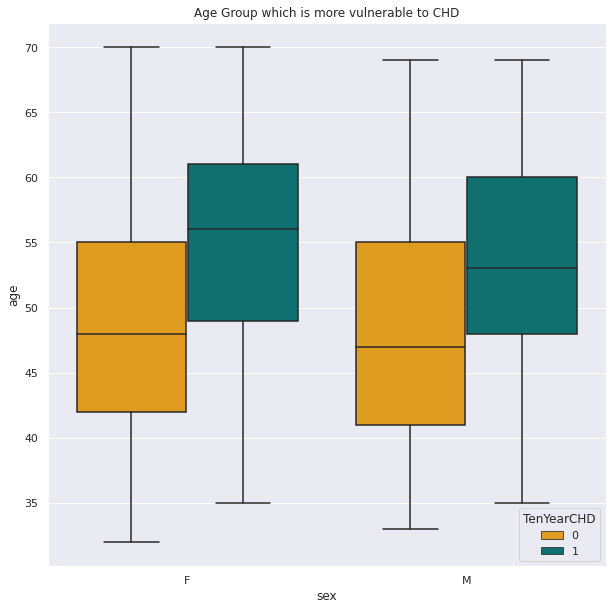

In [58]:
plt.figure(figsize = (10,10))
sns.boxplot(x = cvs_df['sex'], y = cvs_df['age'], hue = cvs_df['TenYearCHD'], palette = my_palette)
plt.title("Age Group which is more vulnerable to CHD")
plt.show()

**Is hypertensive patients are at more risk of coronary heart disease ??**

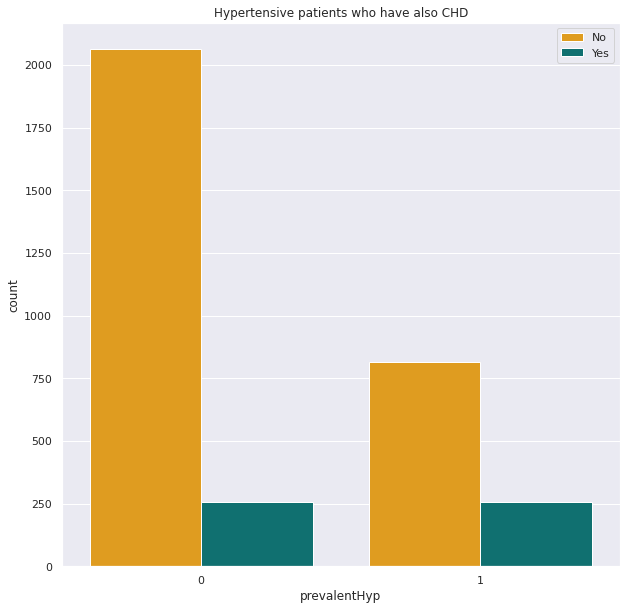

In [63]:
plt.figure(figsize = (10,10))
my_palette = {0 : 'orange' , 1 : 'teal'}
sns.countplot(x = cvs_df['prevalentHyp'], hue = cvs_df['TenYearCHD'], palette = my_palette)
plt.title("Hypertensive patients who have also CHD")
plt.legend(['No','Yes'])
plt.show()

**Is cholesterol are risk of coronary heart disease ??**

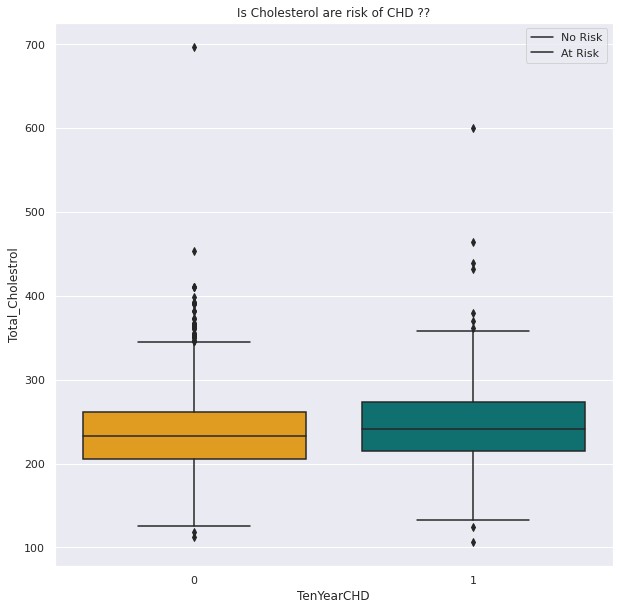

In [60]:
plt.figure(figsize = (10,10))
sns.boxplot(cvs_df['TenYearCHD'], cvs_df['Total_Cholestrol'], palette = my_palette)
plt.title("Is Cholesterol are risk of CHD ??")
# plt.legend(['No Risk','At Risk'])
plt.show()

This indicates that cholestrol level is not the sole deciding factor for predicting whether the person gets coronary heart disease or not. People with similar levels of cholestrol have got coronary heart disease as well as are free from coronary heart disease. Clearly, there is no direct correlation of coronary heart disease with the cholestrol level.

**Let's take a deeper look into it.**

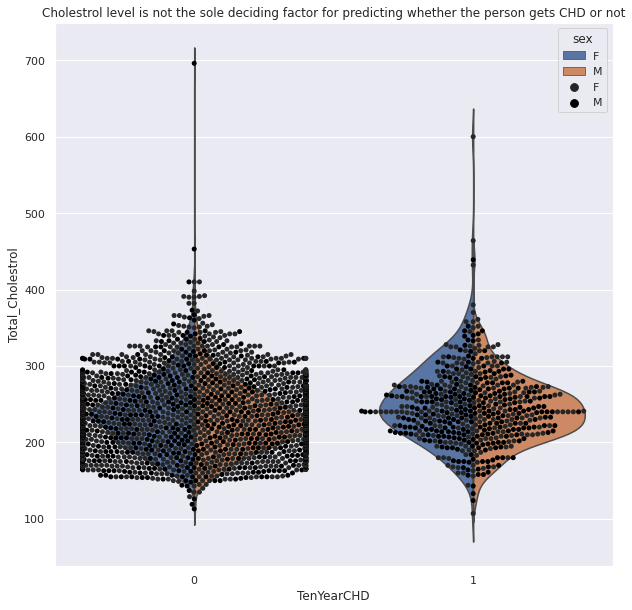

In [45]:
gender_palette = {'male' : 'teal', 'female' : 'orange'}
plt.figure(figsize = (10,10))
sns.violinplot(cvs_df['TenYearCHD'], cvs_df['Total_Cholestrol'], hue = cvs_df['sex'], split = True)
sns.swarmplot(cvs_df['TenYearCHD'], cvs_df['Total_Cholestrol'], color = 'black',hue = cvs_df['sex'])
plt.title("Cholestrol level is not the sole deciding factor for predicting whether the person gets CHD or not")
  
plt.show()

**The above plot confirms the inference made above.**